In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Boston House Price data set

In [2]:
boston = load_boston()

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
print("Data: ", boston.data.shape)
print("Target: ", boston.target.shape)

Data:  (506, 13)
Target:  (506,)


In [5]:
# selecting the number of rooms data column
boston_rm = boston.data[:, 5].reshape(-1, 1)

In [6]:
print("Number of rooms column: ", boston_rm.shape)
print("Median price column: ", boston.target.shape)

Number of rooms column:  (506, 1)
Median price column:  (506,)


In [7]:
# using train_test_split to divide data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(boston_rm, boston.target, test_size=0.3, random_state=33)

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((354, 1), (152, 1), (354,), (152,))

In [9]:
# sort x, y pairs in X_test and y_test and save back in new X_test and y_test numpy arrays
def sort_arrays(X_tmp, y_tmp):
    tmp_array = [(x, y) for x, y in zip(X_tmp, y_tmp)]
    # sorting for lists is determined on the first element of each list
    tmp_array.sort()
    X_test, y_test = [], []
    for pair in tmp_array:
        X_test.append(pair[0])
        y_test.append(pair[1])
    return np.array(X_test), np.array(y_test)

In [10]:
X_test, y_test = sort_arrays(X_test, y_test)
X_test.shape, y_test.shape

((152, 1), (152,))

## Regression

### Linear regression

In [11]:
# initializing linear regression model
regr = LinearRegression()
# train the model using the training sets
%timeit regr.fit(X_train, y_train)
# make predictions using the testing set
y_pred = regr.predict(X_test)

286 µs ± 12.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [12]:
# the regression coefficients
print("Coefficient: {0:.4f}; Intercept: {1:.4f}".format(*regr.coef_, regr.intercept_))
# the mean squared error
print("Mean squared error: {:.4f}".format(mean_squared_error(y_test, y_pred)))
# explained variance score: 1 is perfect prediction
print("Variance score: {:.4f}".format(r2_score(y_test, y_pred)))

Coefficient: 9.4106; Intercept: -36.3451
Mean squared error: 43.2094
Variance score: 0.4021


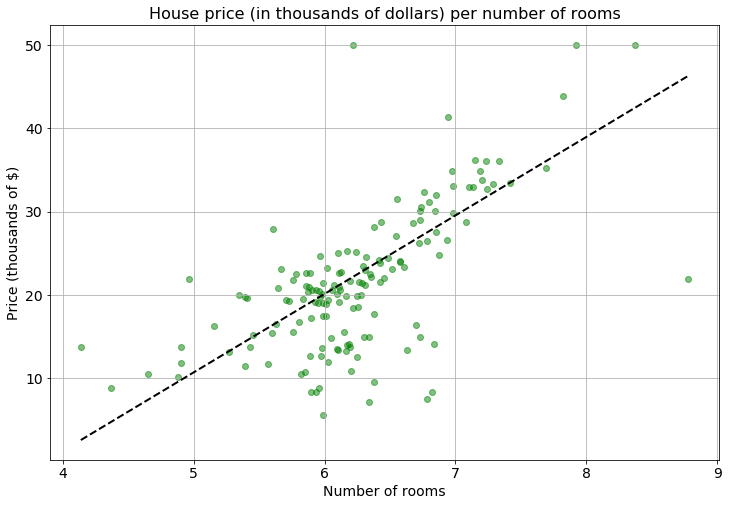

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(X_test, y_test, c='g', marker='o', alpha=0.5)
ax.plot(X_test, y_pred, 'k--', lw=2)
ax.set_title("House price (in thousands of dollars) per number of rooms", fontsize=16)
ax.set_xlabel("Number of rooms", fontsize=14)
ax.set_ylabel("Price (thousands of $)", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

### Polynomial regression

In [14]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

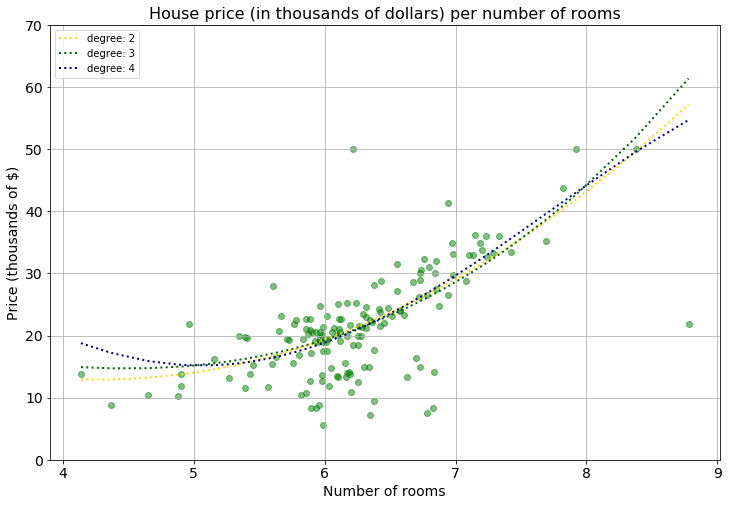

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
colors = ['gold', 'darkgreen', 'navy']
lw = 2

ax.scatter(X_test, y_test, c='green', marker='o', alpha=0.5)

for count, degree in enumerate(range(2,5)):
    model = make_pipeline(PolynomialFeatures(degree), Ridge())
    model.fit(X_train, y_train)
    y_model = model.predict(X_test)
    plt.plot(X_test, y_model, color=colors[count], linewidth=lw, linestyle = ':', label="degree: {:d}".format(degree))

plt.legend(loc='upper left')
ax.set_title("House price (in thousands of dollars) per number of rooms", fontsize=16)
ax.set_xlabel("Number of rooms", fontsize=14)
ax.set_ylabel("Price (thousands of $)", fontsize=14)
plt.ylim([0, 70])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.show()

In [16]:
# the mean squared error
print("Mean squared error: {:.4f}".format(mean_squared_error(y_test, y_model)))
# explained variance score: 1 is perfect prediction
print("Variance score: {:.4f}".format(r2_score(y_test, y_model)))

Mean squared error: 41.4763
Variance score: 0.4261
